In [1]:
# Author : jam-abhyansh06

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('./dataset/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().values.any() # to check if any value is null

False

In [6]:
correlation = data.corr()  # correlation matrix
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


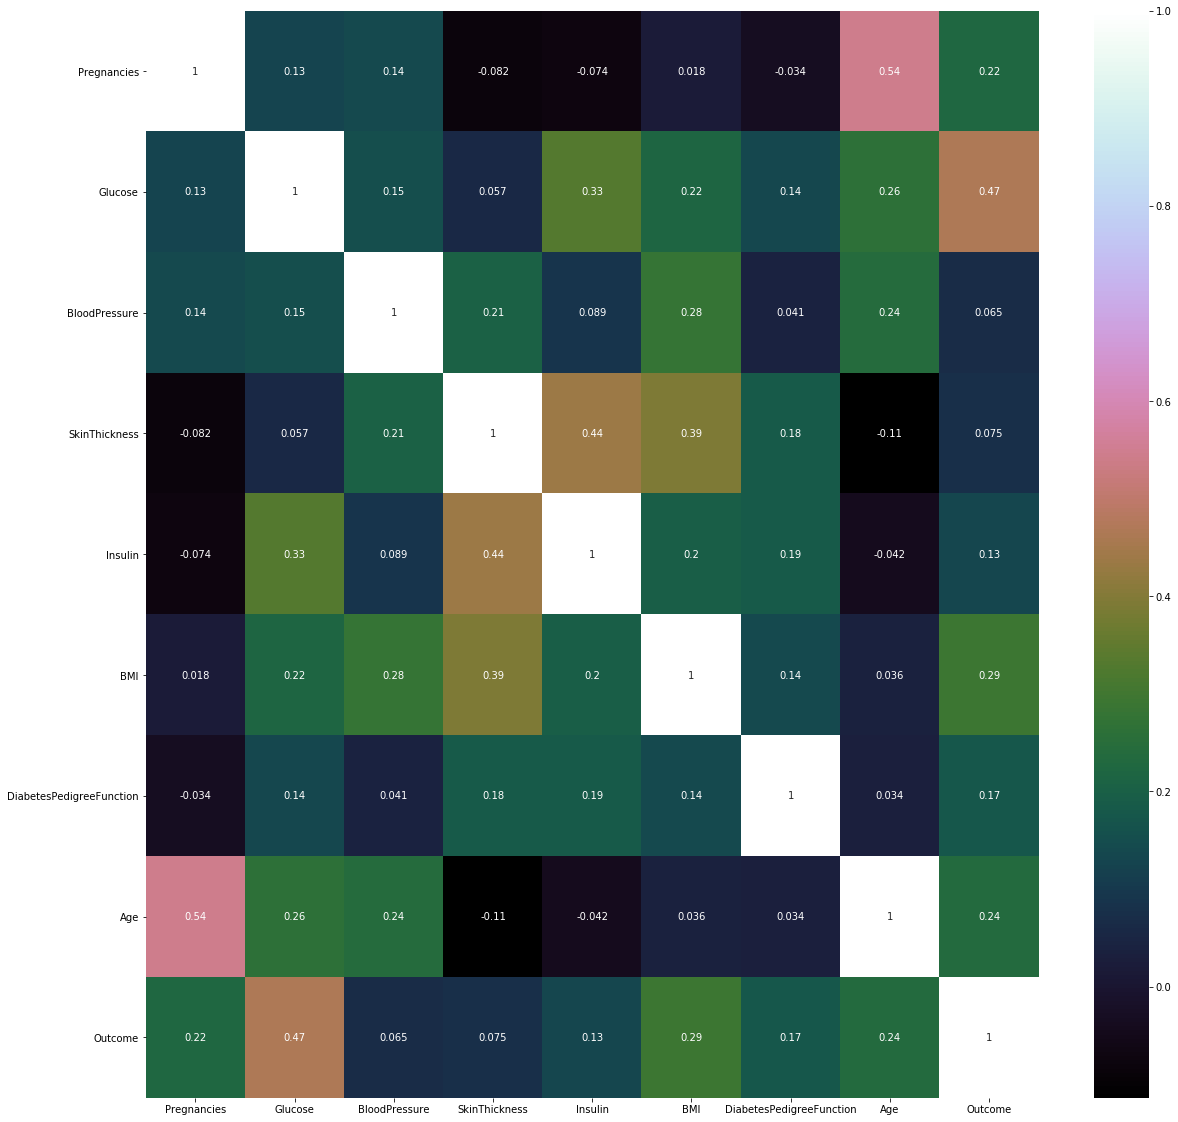

In [7]:
# plot heatmap of correlation matrix
plt.figure(figsize=(20,20))
hmap = sns.heatmap(correlation, annot=True, cmap="cubehelix")

In [8]:
outcome_true = len(data.loc[data['Outcome'] == 1])
outcome_false = len(data.loc[data['Outcome'] == 0])
(outcome_true, outcome_false)

(268, 500)

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
predict_class = ['Outcome']

In [11]:
X = data[features].values
y = data[predict_class].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 12)

In [12]:
print('Total rows : {0}'.format(len(data)))
print("Rows missing in Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("Rows missing in BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("Rows missing in SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("Rows missing in Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("Rows missing in BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("Rows missing in DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("Rows missing in Age: {0}".format(len(data.loc[data['Age'] == 0])))


Total rows : 768
Rows missing in Glucose: 5
Rows missing in BloodPressure: 35
Rows missing in SkinThickness: 227
Rows missing in Insulin: 374
Rows missing in BMI: 11
Rows missing in DiabetesPedigreeFunction: 0
Rows missing in Age: 0


In [13]:
from sklearn.preprocessing import Imputer
fill_values = Imputer(missing_values = 0, strategy='mean', axis = 0)
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

/home/jammy_jay/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC
random_forest_model = RFC(random_state = 12)
random_forest_model.fit(X_train, y_train.ravel())

/home/jammy_jay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [15]:
from sklearn import tree
estimators = random_forest_model.estimators_

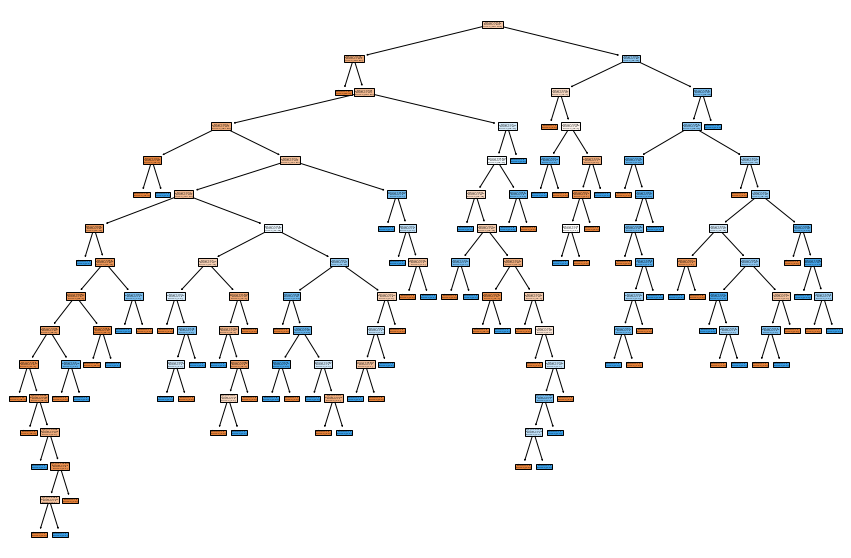

In [16]:
# rough visualization of decision tree in random forest

plt.figure(figsize=(15,10))
for i in range(len(estimators)):
    tree.plot_tree(estimators[i], filled=True)
# tree.plot_tree(random_forest_model.estimators_[0], filled=True)

In [17]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.727


In [18]:
# Hyperparameter optimization

from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [19]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [20]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,
                                     scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [21]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [22]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



 Time taken: 0 hours 0 minutes and 4.03 seconds.


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.9s finished


In [23]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [24]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

score

array([0.66233766, 0.77922078, 0.74025974, 0.71428571, 0.71428571,
       0.71428571, 0.77922078, 0.81818182, 0.76315789, 0.78947368])

In [26]:
score.mean()

0.7474709501025292